In [1]:
import pandas as pd
from statistics import mean, stdev
import scipy
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import glob
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (8,7)

# Data

In [3]:
data = pd.read_csv('architecture_results.csv')

In [4]:
data

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs
0,architecture_1,85.452946,0.391653,0.8715,0.866800,0.401928,49,1
1,architecture_2,496.551328,1.650918,0.7226,0.710183,1.730577,83,1
2,architecture_3,63.082690,0.553205,0.8489,0.843683,0.581588,107,1
3,architecture_4,1821.122378,2.430641,0.0980,0.098717,2.427119,374,1
4,architecture_5,35.916053,0.395499,0.8709,0.865417,0.410692,23,1
5,architecture_6,241.410889,0.181305,0.9468,0.944650,0.184209,350,1
6,architecture_7,17.084729,0.524923,0.8264,0.814800,0.563463,29,1
7,architecture_8,192.187825,1.926970,0.4903,0.477783,1.962522,31,1
8,architecture_9,1290.442637,0.672736,0.7898,0.777550,0.699226,90,1
9,architecture_10,115.181693,2.024919,0.2342,0.229650,2.037516,260,1


# First experiments

In [5]:
test1 = data[:10]

In [10]:
test1

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs
0,architecture_1,85.452946,0.391653,0.8715,0.866800,0.401928,49,1
1,architecture_2,496.551328,1.650918,0.7226,0.710183,1.730577,83,1
2,architecture_3,63.082690,0.553205,0.8489,0.843683,0.581588,107,1
3,architecture_4,1821.122378,2.430641,0.0980,0.098717,2.427119,374,1
4,architecture_5,35.916053,0.395499,0.8709,0.865417,0.410692,23,1
5,architecture_6,241.410889,0.181305,0.9468,0.944650,0.184209,350,1
6,architecture_7,17.084729,0.524923,0.8264,0.814800,0.563463,29,1
7,architecture_8,192.187825,1.926970,0.4903,0.477783,1.962522,31,1
8,architecture_9,1290.442637,0.672736,0.7898,0.777550,0.699226,90,1
9,architecture_10,115.181693,2.024919,0.2342,0.229650,2.037516,260,1


<function matplotlib.pyplot.show(close=None, block=None)>

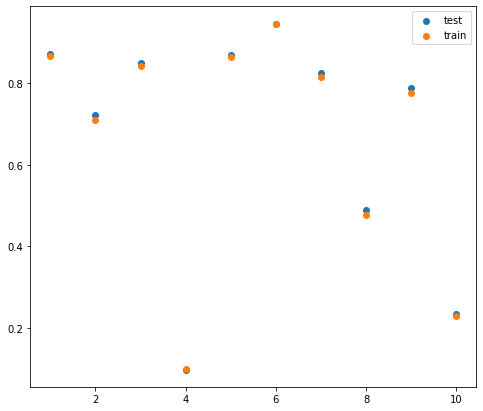

In [6]:
plt.scatter(range(1,11), test1['test_result_acc'], label="test")
plt.scatter(range(1,11), test1['train_result_acc'], label="train")

plt.legend()
plt.show

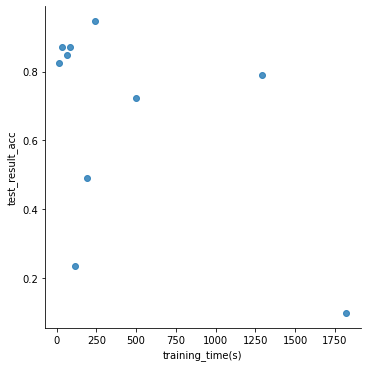

In [7]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test1,
    fit_reg=False
)

In [8]:
test2 = data[10:20]

In [9]:
test2

,file_name,training_time(s),test_result_loss,test_result_acc,train_result_acc,train_result_loss,nb_layers,epochs
10,architecture_1,48.561775,0.165680,0.9495,0.945933,0.171723,40,1
11,architecture_2,3528.691985,3.417711,0.3069,0.304400,3.420307,395,1
12,architecture_3,4626.932649,0.157278,0.9528,0.951617,0.158950,158,1
13,architecture_4,48.286486,0.805995,0.7421,0.734950,0.818321,73,1
14,architecture_5,214.448735,0.827812,0.7956,0.800733,0.821935,134,1
15,architecture_6,3006.108704,0.158101,0.9566,0.952317,0.171927,99,1
16,architecture_7,323.252692,0.790300,0.7787,0.776383,0.824870,62,1
17,architecture_8,959.339462,0.218612,0.9575,0.954817,0.219764,64,1
18,architecture_9,4439.450650,0.389962,0.9050,0.898733,0.405778,193,1
19,architecture_10,31.925409,1.116448,0.6393,0.637433,1.118126,124,1


<function matplotlib.pyplot.show(close=None, block=None)>

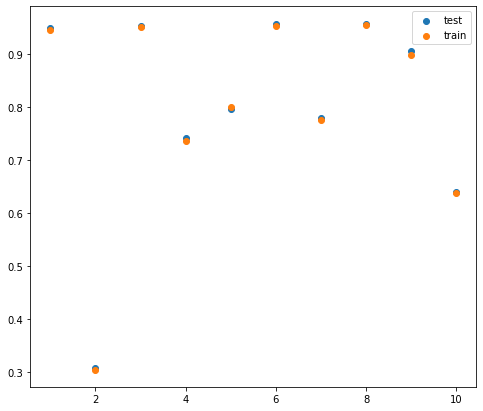

In [11]:
plt.scatter(range(1,11), test2['test_result_acc'], label="test")
plt.scatter(range(1,11), test2['train_result_acc'], label="train")

plt.legend()
plt.show

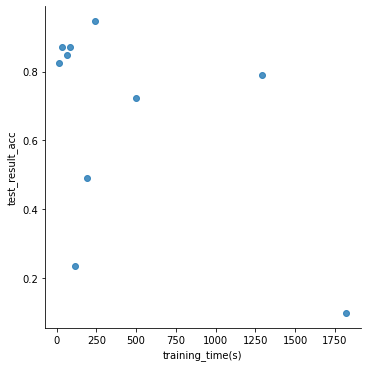

In [12]:
sns.lmplot(
    x='training_time(s)',
    y='test_result_acc',
    data=test1,
    fit_reg=False
)